In [1]:
import numpy as np
import cv2 as cv
import os

In [24]:
import matplotlib.pyplot as plt
from PIL import Image

In [19]:
mX = []
my = []
path = 'data-collection'
for dir in os.listdir(path):
    # print(int(dir))
    for file in os.listdir(f"{path}/{dir}"):
        p = f'{path}/{dir}/{file}'
        img = cv.imread(p)
        img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
        mX.append(img)
        my.append(int(dir))
        # print(p, img.shape,int(dir))

    

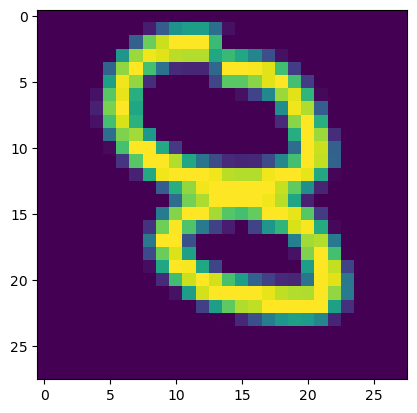

In [57]:
# plt.imshow((im + 40) % 255)
plt.imshow((255 - (im + 40)) % 255)

In [45]:
# img1 = cv.imread("data-collection/0/0.png")
# _,th1 = cv.threshold((im + 40) % 255, 125, 255,cv.THRESH_BINARY)
# th1

In [47]:
# plt.imshow(th1)

In [50]:
np.set_printoptions(linewidth=np.inf)


In [54]:
# img1 = cv.imread("data-collection/0/0.png")
im = Image.open(r"data-collection/8/0.png")  
im = im.convert('L')
im = np.array(im)
print((255 - (im + 40)) % 255)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  14  53  95 104 104  67   8   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  57 143 170 185 185 185 126   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  97 157 181 177 166 164 164 111 125 111  84  45   8   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  59 154 185 130  70  23  20  20  62 185 185 183 177 129  32   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 105 181 155  24   0   0   0   0  39 138 138 152 177 185 130  32   0   0   0   0   0   0   0]
 [  0   0   0   0   9 137 179 116   0   0   0   0   0   0   0   8  37  86 157 177 122   4   0   0   0   0   0   0]
 [  0   0   0   0  17 148 185 109   0   0   0   0   0   0   0   0   0   0  91 181 163  55   0   0   0   0   0   0]
 [  0   0   0   0   9 130 174 118   0   0   0   0   0   0   0   0   0   0  22 15

In [12]:
# cv.cvtColor(img1,cv.COLOR_BGR2GRAY).reshape(-1)
# cv.cvtColor(img1,cv.COLOR_BGR2GRAY).reshape(-1).shape

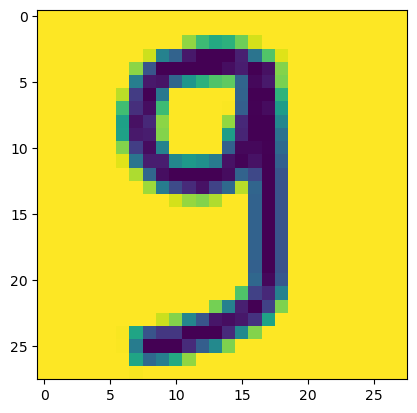

In [23]:
plt.imshow(mX[0])

In [58]:
# mX[0]


In [32]:
import tensorflow as tf

In [33]:
from tensorflow.keras.datasets.mnist import load_data

In [34]:
(X_train, y_train), (X_test, y_test) = load_data()

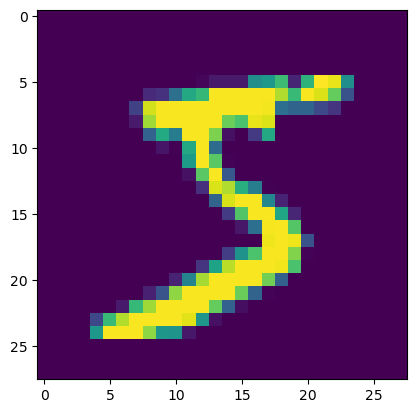

In [36]:
plt.imshow(X_train[0])

In [59]:
# X_train[0]

In [8]:
type(X_train)

numpy.ndarray

In [9]:
np.array(mX).shape, np.array(my).shape

((213, 28, 28), (213,))

In [42]:
X_train_new = np.append(X_train, mX,axis=0)

In [28]:
y_train_new = np.append(y_train,my)

In [43]:
X_train_new.shape, y_train_new.shape

((60213, 28, 28), (60213,))

In [44]:
X_train_flat = X_train_new.reshape(-1,28*28,1)
X_test_flat = X_test.reshape(-1,28*28,1)
X_train_flat.shape, X_test_flat.shape

((60213, 784, 1), (10000, 784, 1))

In [45]:
# defining ANN model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(32,activation='relu',input_shape=(28*28,)),
                             tf.keras.layers.Dense(64,activation='relu'),
                             tf.keras.layers.Dense(10,activation='softmax')])

In [46]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [48]:
model.fit(X_train_flat,y_train_new,epochs=10)

Epoch 1/10


2024-03-08 11:14:48.117198: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1882/1882 [==============================] - 1s 432us/step - loss: 1.2268 - accuracy: 0.6985
Epoch 2/10
1882/1882 [==============================] - 1s 428us/step - loss: 0.5513 - accuracy: 0.8598
Epoch 3/10
1882/1882 [==============================] - 1s 417us/step - loss: 0.4888 - accuracy: 0.8803
Epoch 4/10
1882/1882 [==============================] - 1s 423us/step - loss: 0.4580 - accuracy: 0.8894
Epoch 5/10
1882/1882 [==============================] - 1s 414us/step - loss: 0.4287 - accuracy: 0.8972
Epoch 6/10
1882/1882 [==============================] - 1s 419us/step - loss: 0.4018 - accuracy: 0.9015
Epoch 7/10
1882/1882 [==============================] - 1s 417us/step - loss: 0.3703 - accuracy: 0.9074
Epoch 8/10
1882/1882 [==============================] - 1s 408us/step - loss: 0.3531 - accuracy: 0.9099
Epoch 9/10
1882/1882 [==============================] - 1s 414us/step - loss: 0.3275 - accuracy: 0.9141
Epoch 10/10
1882/1882 [==============================] - 1s 418us/step - lo

In [51]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [53]:
(X_t, y_t) = unison_shuffled_copies(X_train_flat,y_train_new)

In [54]:
X_t.shape, y_t.shape

((60213, 784, 1), (60213,))

In [55]:
model.fit(X_train_flat,y_train_new,epochs=15)

Epoch 1/15
1882/1882 [==============================] - 1s 409us/step - loss: 0.2943 - accuracy: 0.9207
Epoch 2/15
1882/1882 [==============================] - 1s 407us/step - loss: 0.2791 - accuracy: 0.9243
Epoch 3/15
1882/1882 [==============================] - 1s 405us/step - loss: 0.2735 - accuracy: 0.9263
Epoch 4/15
1882/1882 [==============================] - 1s 408us/step - loss: 0.2657 - accuracy: 0.9280
Epoch 5/15
1882/1882 [==============================] - 1s 403us/step - loss: 0.2561 - accuracy: 0.9291
Epoch 6/15
1882/1882 [==============================] - 1s 406us/step - loss: 0.2489 - accuracy: 0.9308
Epoch 7/15
1882/1882 [==============================] - 1s 405us/step - loss: 0.2443 - accuracy: 0.9329
Epoch 8/15
1882/1882 [==============================] - 1s 410us/step - loss: 0.2437 - accuracy: 0.9339
Epoch 9/15
1882/1882 [==============================] - 1s 402us/step - loss: 0.2380 - accuracy: 0.9348
Epoch 10/15
1882/1882 [==============================] - 1s 403u

In [56]:
model.save("ann-mnist-digit-8Mar-v02.keras",save_format='keras')

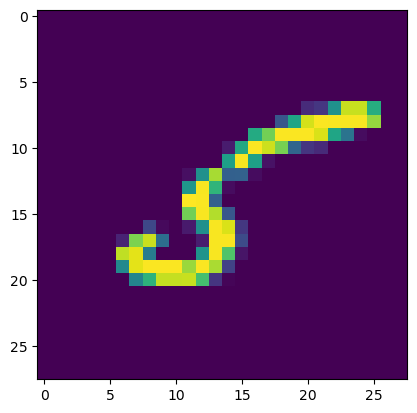

In [65]:
plt.imshow(X_train[11])